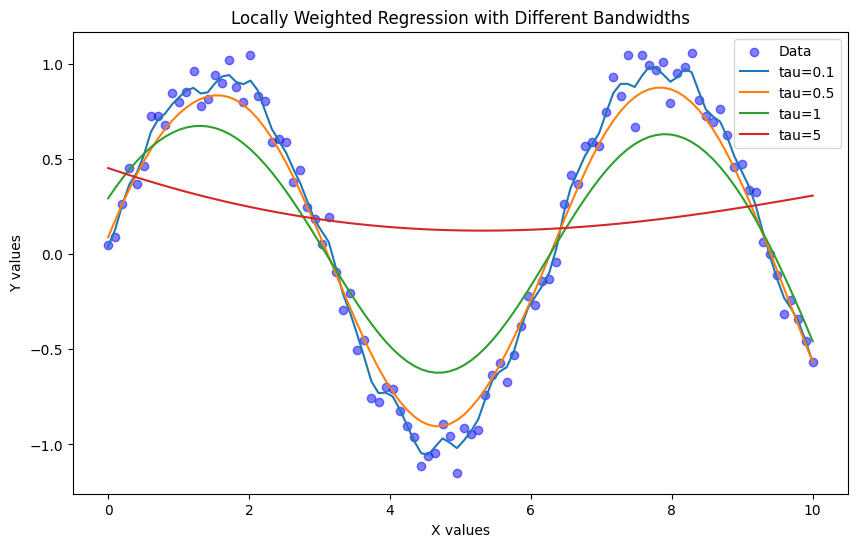

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.1, 100)  # Sinusoidal data with noise

# Define Locally Weighted Regression function
def locally_weighted_regression(x_query, X, y, tau):
    m = X.shape[0]
    W = np.diag(np.exp(-((X[:, 1] - x_query[1]) ** 2) / (2 * tau ** 2)))  # Diagonal weight matrix
    theta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y  # Compute theta
    return x_query @ theta

# Fit Locally Weighted Regression for different values of tau
tau_values = [0.1, 0.5, 1, 5]
X_ones = np.c_[np.ones(X.shape[0]), X]  # Add bias term

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data', color='blue', alpha=0.5)

for tau in tau_values:
    y_pred = np.array([locally_weighted_regression(np.array([1, x_i]), X_ones, y, tau) for x_i in X])
    plt.plot(X, y_pred, label=f'tau={tau}')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Locally Weighted Regression with Different Bandwidths')
plt.legend()
plt.show()
